In [14]:
module avail


---------- /software/OSutils/modules-4.4.1/share/Modules/modulefiles -----------
1SynChro/1.15
3d-dna/180922
A5-miseq/20160825
abyss/2.0.2
abyss/2.1.0
abyss/2.1.1
abyss/2.1.2
abyss/2.1.3
abyss/2.1.4
abyss/2.1.5
adapterremoval/2.2.2
AfterQC/0.9.1
AfterQC/0.9.5
allpathslg/44837
allpathslg/44913
allpathslg/49722
allpathslg/50191
allpathslg/52488
amos/3.1.0
angsd/0.913
angsd/0.917
angsd/0.917-116-g5d087b2
angsd/0.918
angsd/0.919
angsd/0.921
angsd/0.922
angsd/0.923
angsd/0.925
angsd-wrapper/7224db2
anytag/2.5.2
apsim/7.10-r49ace54f9c8a670190aef9d8d0fb9d5477bb1534
apsim/7.9-r4047
apsimx/2018.01.30.2253
apsimx/2018.09.28.3099
apsimx/2019.01.08.3392
apsimx/2019.04.03.3693
apsimx/2019.06.05.3920
apsimx/2019.07.18.4025
apsimx/2019.10.04.4236
apsimx/2020.04.09.5012
apsimx/2020.08.04.5350
arcs/1.0.6
art/MountRainier
aspera-cli/3.7.2.354.010c3b8
assemblathon_stats/14dfdab
assemblathon_stats/2011_10_13
asub/2.1
augustus/3.2.2
augustus/3.3
augustus/3.3.1
augustus/3.3.3-new
aws-cli/2.0.43
bam2fastx/1

perl/5.16.3
perl/5.16.3-thread-multi
perl/5.18.4
perl/5.20.3
perl/5.20.3-thread-multi
perl/5.22.2
perl/5.22.2-thread-multi
perl/5.24.0
perl/5.24.0-thread-multi
perl/5.24.1
perl/5.24.1-thread-multi
perl/5.26.0
perl/5.26.0-thread-multi
perl/5.28.0
perl/5.28.0-thread-multi
perl/5.30.2
perl/5.30.2-thread-multi
perl/5.8.9
perl/5.8.9-thread-multi
perl/bio-extras
perl/bio-extras-5.24.0-legacy
perl/core
perl/ensembl
perl/jupyterhub
perlbrew/0.76
pfr-python2/2.7.13
pfr-python3/3.6.1
pfr-python3/3.6.5
pfr-python3/3.6.6
phylip/3.696
phylobayes/4.1c
PhyloSift/1.0.1
picard-tools/1.112
picard-tools/1.79
picard-tools/2.10.1
picard-tools/2.18.7
picard-tools/2.2.4
picard-tools/2.9.4
picrust2/2.3.0
pilon/1.18
pilon/1.20
pilon/1.23
pinfish/0.1.0
platanus/1.2.4
platanus_trim/1.0.7
Platypus/0.8.1
plink/1.07
plink/1.90b6.5
plink2/v2.00a2lm
plncpro/1.1
popoolation2/1201
porechop/0.2.3
portcullis/1.1.0
portcullis/1.1.1
portcullis/1.1.2
powerPlant/core
powerPlant/locate
pplacer/v1.1.alpha17-6-g5cecf99
ppsPCP/1

# Download popLDdecay

In [ ]:
git clone https://github.com/BGI-shenzhen/PopLDdecay.git

# Filter out a chromosome as an example

In [41]:
module load vcftools/0.1.14
out=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/chromosome_separated_vcfs/
vcf=/workspace/hramzr/2_Phd_PROJECT/VarCallingWGS/freebayes/80_Samples_FB.vcf
for i in {1..25};
do
bsub \
-e logs/fchrom.e -o logs/fchrom.o -J "filter_chromosomes" \
"vcftools  --vcf  $vcf  --chr LG${i}  --recode --recode-INFO-all --out  ${out}VCF_80_samples_LG${i}"
done


Job <437844> is submitted to default queue <lowpriority>.
Job <437845> is submitted to default queue <lowpriority>.
Job <437846> is submitted to default queue <lowpriority>.
Job <437847> is submitted to default queue <lowpriority>.
Job <437848> is submitted to default queue <lowpriority>.
Job <437849> is submitted to default queue <lowpriority>.
Job <437850> is submitted to default queue <lowpriority>.
Job <437851> is submitted to default queue <lowpriority>.
Job <437852> is submitted to default queue <lowpriority>.
Job <437853> is submitted to default queue <lowpriority>.
Job <437854> is submitted to default queue <lowpriority>.
Job <437855> is submitted to default queue <lowpriority>.
Job <437856> is submitted to default queue <lowpriority>.
Job <437857> is submitted to default queue <lowpriority>.
Job <437858> is submitted to default queue <lowpriority>.
Job <437859> is submitted to default queue <lowpriority>.
Job <437860> is submitted to default queue <lowpriority>.
Job <437861> i

# Thin if needed

In [71]:
vcfdir=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/chromosome_separated_vcfs/
vcftools --vcf ${vcfdir}VCF_80_samples_LG1.recode.vcf --recode --recode-INFO-all --thin 50000 --out "LG1_50kb_thinned"



VCFtools - 0.1.14
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /workspace/hramzr/2_Phd_PROJECT/SNP_stats/chromosome_separated_vcfs/VCF_80_samples_LG1.recode.vcf
	--recode-INFO-all
	--thin 50000
	--out LG1_50kb_thinned
	--recode

After filtering, kept 80 out of 80 Individuals
Outputting VCF file...
After filtering, kept 667 out of a possible 1017546 Sites
Run Time = 10.00 seconds


# Make subsample list for males and females

In [11]:
males=$(cat /workspace/hramzr/2_Phd_PROJECT/VarCallingWGS/help_files/males.lst)
females=$(cat /workspace/hramzr/2_Phd_PROJECT/VarCallingWGS/help_files/females.lst)
out=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/subsamples/
for id in $males
do
echo SID_$id>>${out}male.sub
done

for id in $females
do
echo SID_$id>>${out}female.sub
done

# Gunzip all VCF

In [48]:
module load bcftools/1.9
vcfdir=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/chromosome_separated_vcfs/
gzdir=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/chromosome_separated_vcfs/gz/
for i in {1..25}
do
bsub \
-o logs/gz.o -e logs/gz.e -J "gz" \
"bcftools view ${vcfdir}VCF_80_samples_LG${i}.recode.vcf -Oz -o ${gzdir}VCF_80_samples_LG${i}.vcf.gz"
done

Job <437871> is submitted to default queue <lowpriority>.
Job <437872> is submitted to default queue <lowpriority>.
Job <437873> is submitted to default queue <lowpriority>.
Job <437874> is submitted to default queue <lowpriority>.
Job <437875> is submitted to default queue <lowpriority>.
Job <437876> is submitted to default queue <lowpriority>.
Job <437877> is submitted to default queue <lowpriority>.
Job <437878> is submitted to default queue <lowpriority>.
Job <437879> is submitted to default queue <lowpriority>.
Job <437880> is submitted to default queue <lowpriority>.
Job <437881> is submitted to default queue <lowpriority>.
Job <437882> is submitted to default queue <lowpriority>.
Job <437883> is submitted to default queue <lowpriority>.
Job <437884> is submitted to default queue <lowpriority>.
Job <437885> is submitted to default queue <lowpriority>.
Job <437886> is submitted to default queue <lowpriority>.
Job <437887> is submitted to default queue <lowpriority>.
Job <437888> i

# Run for all chromosomes

In [49]:
LDpop=./PopLDdecay/bin/PopLDdecay
gzdir=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/chromosome_separated_vcfs/gz
males=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/subsamples/male.sub
females=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/subsamples/female.sub
out=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/decayfiles/
for i in {1..25}
do
bsub -J RunPOpLDWholeChr -e logs/RunPOpLDWholeChr.err -o logs/RunPOpLDWholeChr.out \
"$LDpop   \
                -InVCF  ${gzdir}/VCF_80_samples_LG${i}.vcf.gz \
                -OutStat ${out}LD_males_LG${i}.decay
                -MaxDist 600
                --SubPop $males"                

bsub -J RunPOpLDWholeChr -e logs/RunPOpLDWholeChr.err -o logs/RunPOpLDWholeChr.out \
"$LDpop   \
                -InVCF  ${gzdir}/VCF_80_samples_LG${i}.vcf.gz \
                -OutStat ${out}LD_females_LG${i}.decay
                -MaxDist 600
                --SubPop $females"
done

Job <437897> is submitted to default queue <lowpriority>.
Job <437898> is submitted to default queue <lowpriority>.
Job <437899> is submitted to default queue <lowpriority>.
Job <437900> is submitted to default queue <lowpriority>.
Job <437901> is submitted to default queue <lowpriority>.
Job <437902> is submitted to default queue <lowpriority>.
Job <437903> is submitted to default queue <lowpriority>.
Job <437904> is submitted to default queue <lowpriority>.
Job <437905> is submitted to default queue <lowpriority>.
Job <437906> is submitted to default queue <lowpriority>.
Job <437907> is submitted to default queue <lowpriority>.
Job <437908> is submitted to default queue <lowpriority>.
Job <437909> is submitted to default queue <lowpriority>.
Job <437910> is submitted to default queue <lowpriority>.
Job <437911> is submitted to default queue <lowpriority>.
Job <437912> is submitted to default queue <lowpriority>.
Job <437913> is submitted to default queue <lowpriority>.
Job <437914> i

In [64]:
module load perl
module load R
LDpop=./PopLDdecay/bin/Plot_OnePop.pl
indir=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/decayfiles/
fig=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/figs/
ldfiles=$(find $indir -name *.gz)
for statfile in $ldfiles
do
prefix=$(basename $statfile | awk -F "." '{print $1}')
bsub \
-J "fig" -o logs/ldpop.o -e logs/ldpop.e -n 8 \
"perl $LDpop -inFile $statfile -output ${fig}${prefix}"
done

perl/jupyterhub(124):ERROR:150: Module 'perl/jupyterhub' conflicts with the currently loaded module(s) 'perl/5.28.0'
perl/jupyterhub(124):ERROR:102: Tcl command execution failed: conflict {perl}

Job <437999> is submitted to default queue <lowpriority>.
Job <438000> is submitted to default queue <lowpriority>.
Job <438001> is submitted to default queue <lowpriority>.
Job <438002> is submitted to default queue <lowpriority>.
Job <438003> is submitted to default queue <lowpriority>.
Job <438004> is submitted to default queue <lowpriority>.
Job <438005> is submitted to default queue <lowpriority>.
Job <438006> is submitted to default queue <lowpriority>.
Job <438007> is submitted to default queue <lowpriority>.
Job <438008> is submitted to default queue <lowpriority>.
Job <438009> is submitted to default queue <lowpriority>.
Job <438010> is submitted to default queue <lowpriority>.
Job <438011> is submitted to default queue <lowpriority>.
Job <438012> is submitted to default queue <lowpri

# Make multi-list

In [68]:
out=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/subsamples/
for i in {1..25}
do
echo "/workspace/hramzr/2_Phd_PROJECT/SNP_stats/decayfiles/LD_females_LG${i}.decay.stat.gz females
/workspace/hramzr/2_Phd_PROJECT/SNP_stats/decayfiles/LD_males_LG${i}.decay.stat.gz males">${out}LG${i}_multilist
done


# Generate plots

In [69]:
LDpop=./PopLDdecay/bin/Plot_MultiPop.pl
list=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/subsamples/Male_Female_multi_list
fig=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/figs/
subsamples=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/subsamples/
for i in {1..25}
do
bsub \
-e logs/multiplot.e -o logs/multiplot.o \
"perl $LDpop \
-inList ${subsamples}LG${i}_multilist \
-output ${fig}LG${i}_mf"
done

Job <438076> is submitted to default queue <lowpriority>.
Job <438077> is submitted to default queue <lowpriority>.
Job <438078> is submitted to default queue <lowpriority>.
Job <438079> is submitted to default queue <lowpriority>.
Job <438080> is submitted to default queue <lowpriority>.
Job <438081> is submitted to default queue <lowpriority>.
Job <438082> is submitted to default queue <lowpriority>.
Job <438083> is submitted to default queue <lowpriority>.
Job <438084> is submitted to default queue <lowpriority>.
Job <438085> is submitted to default queue <lowpriority>.
Job <438086> is submitted to default queue <lowpriority>.
Job <438087> is submitted to default queue <lowpriority>.
Job <438088> is submitted to default queue <lowpriority>.
Job <438089> is submitted to default queue <lowpriority>.
Job <438090> is submitted to default queue <lowpriority>.
Job <438091> is submitted to default queue <lowpriority>.
Job <438092> is submitted to default queue <lowpriority>.
Job <438093> i

# Visualize plots

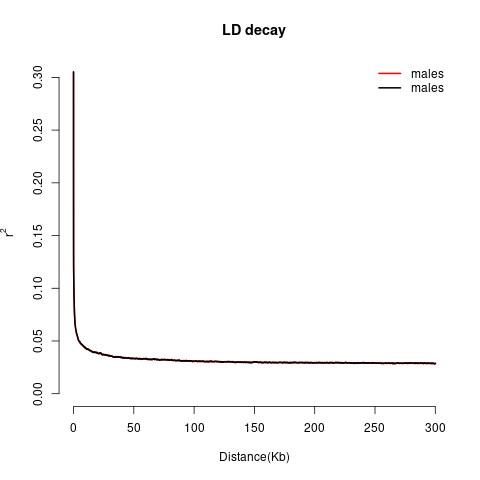

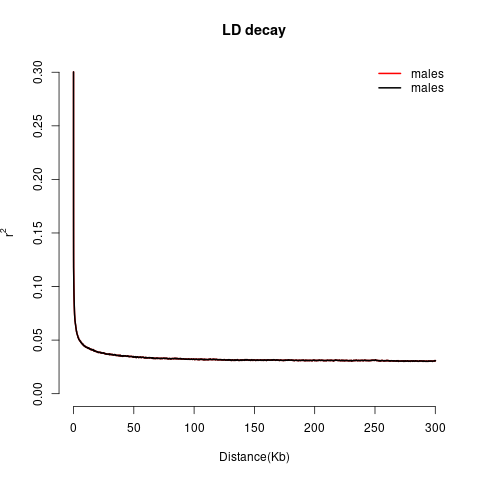

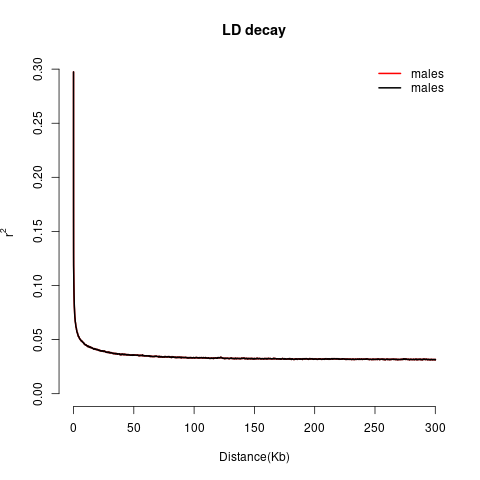

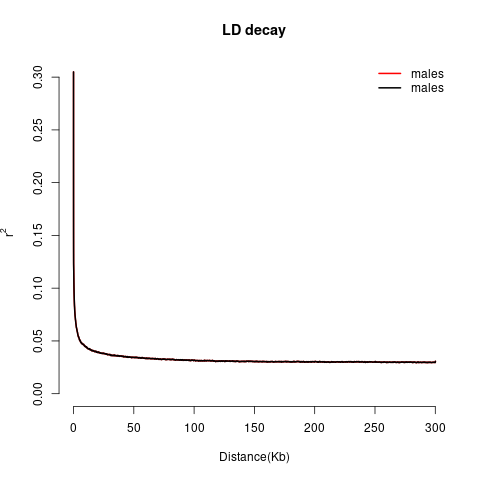

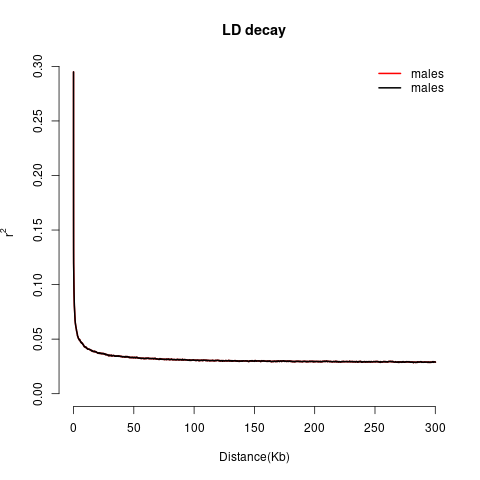

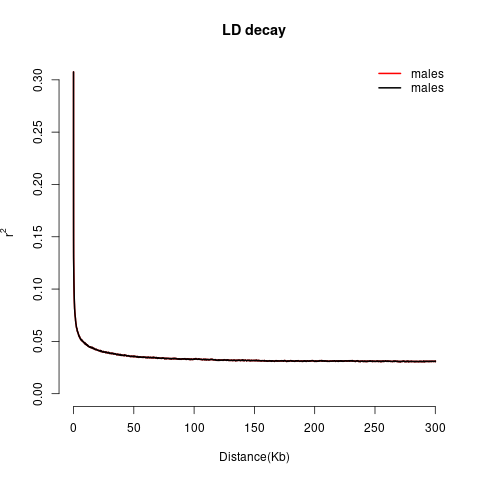

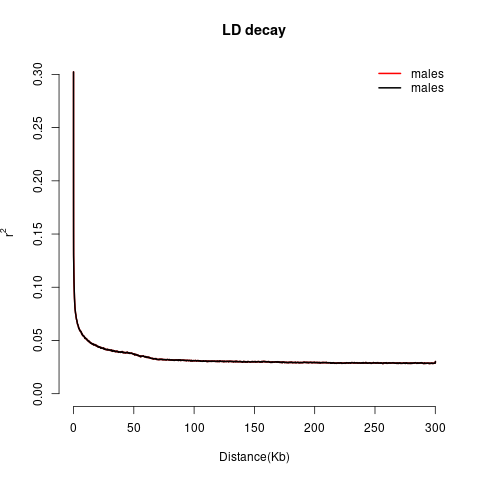

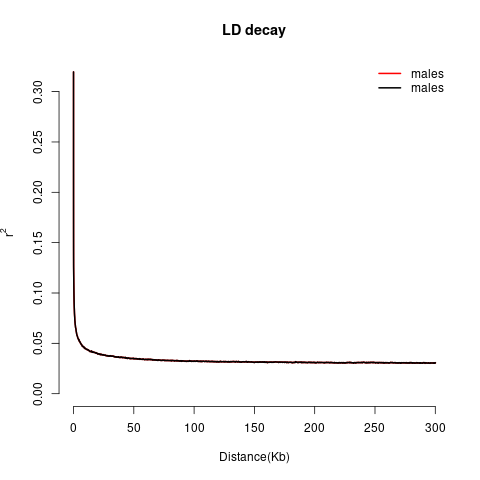

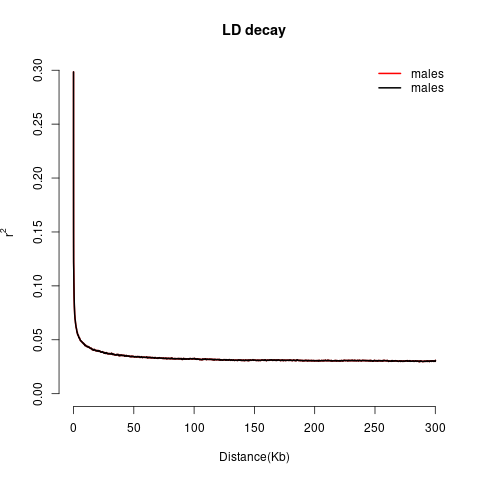

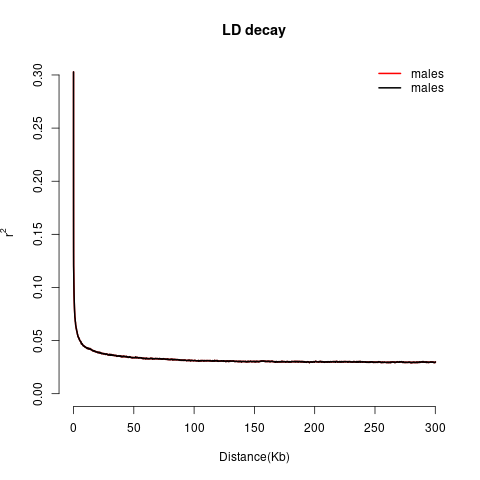

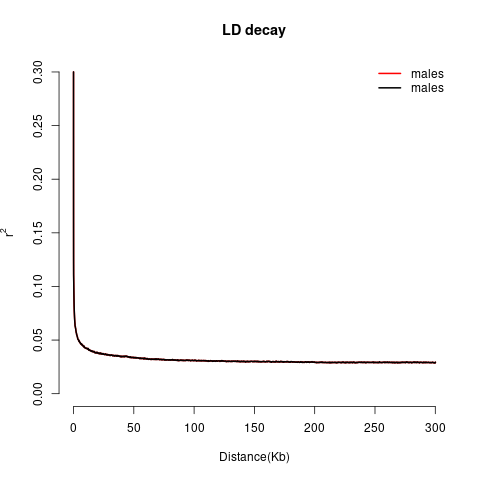

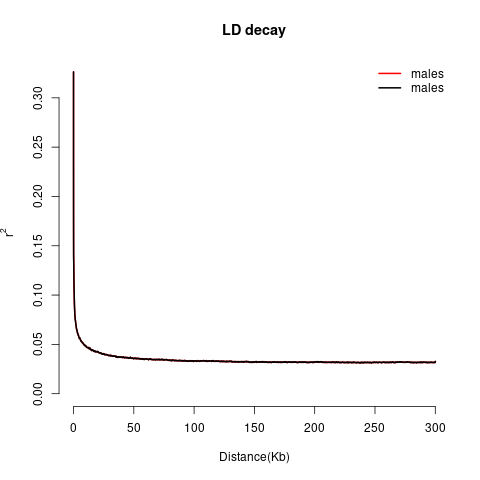

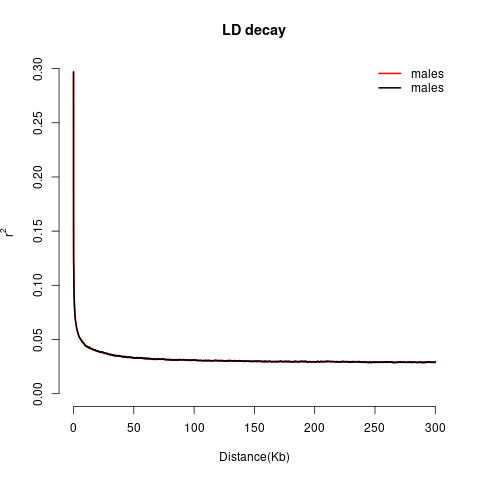

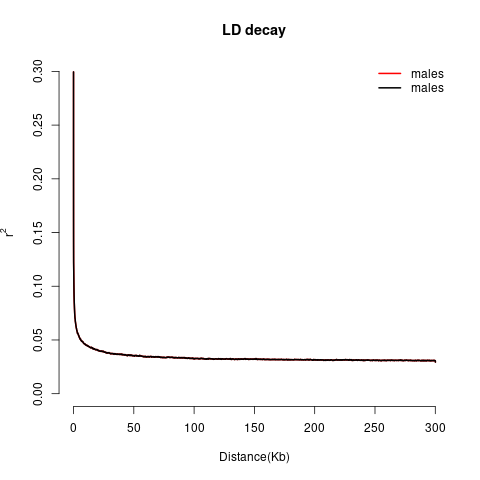

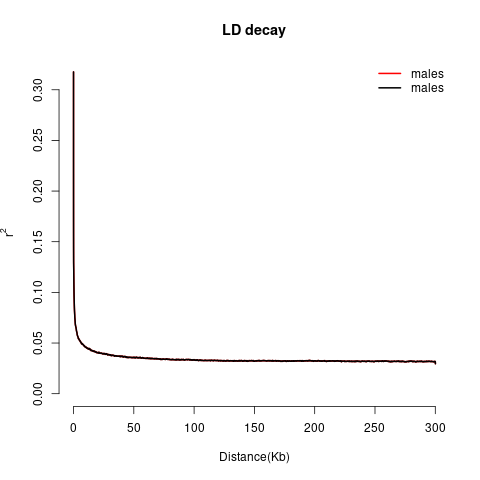

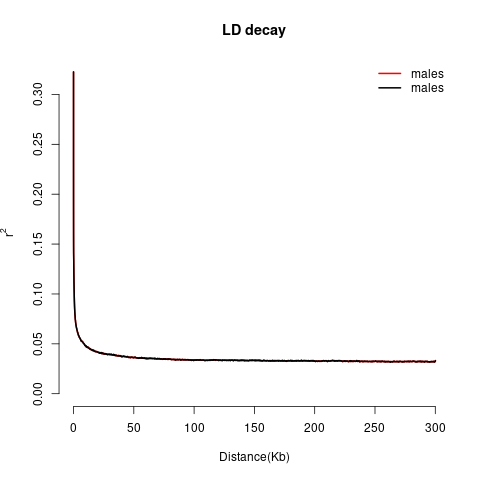

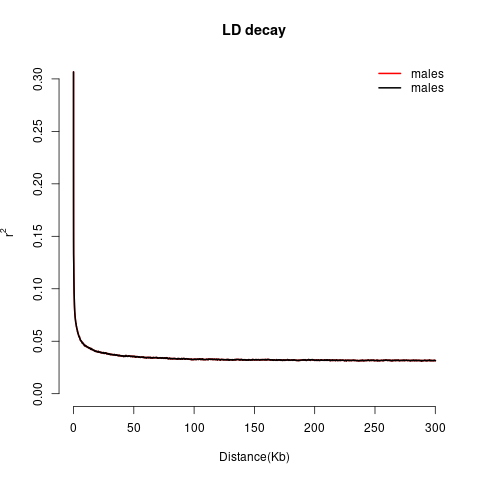

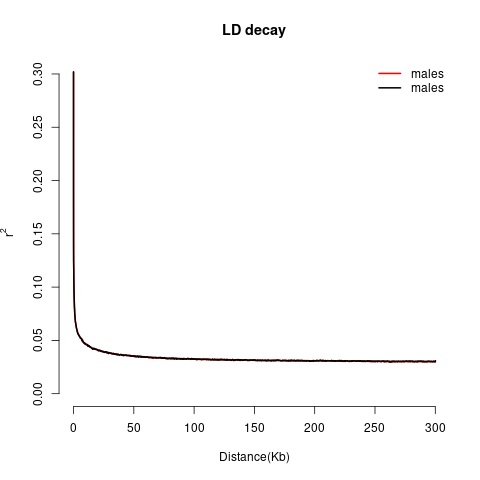

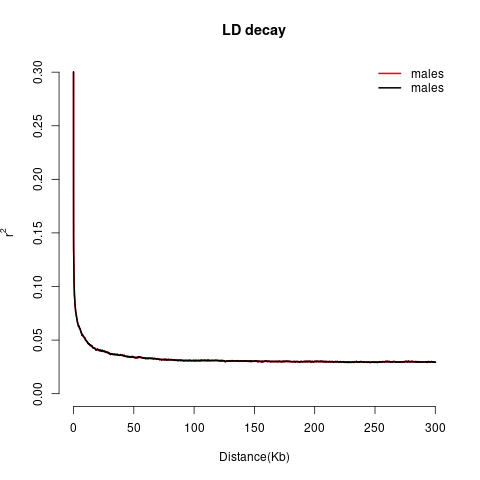

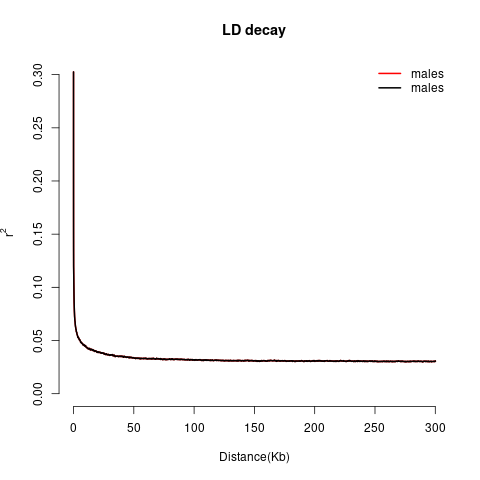

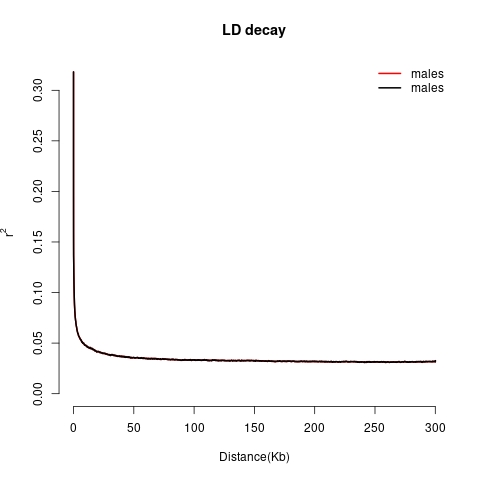

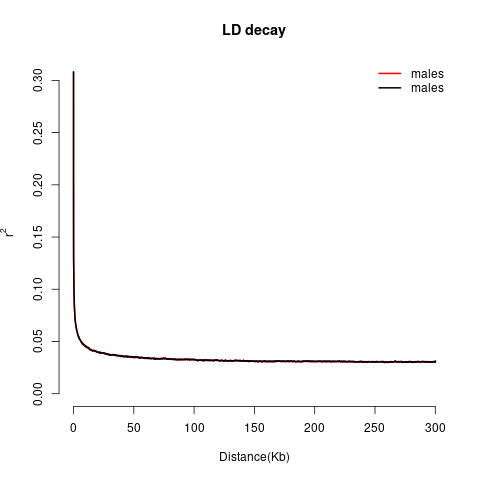

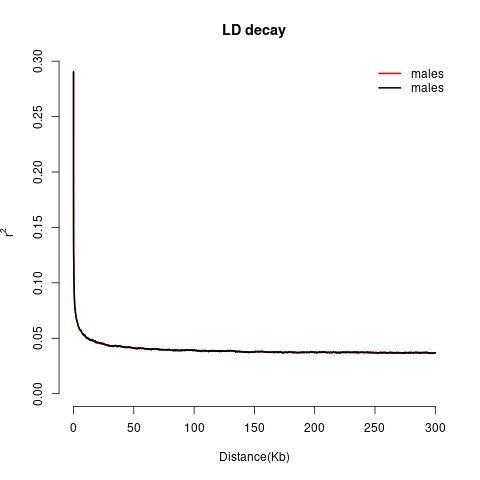

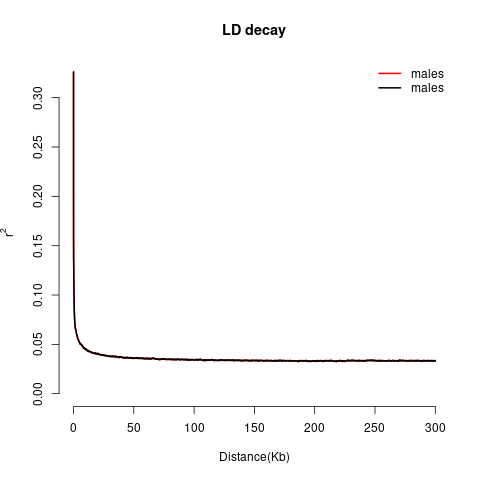

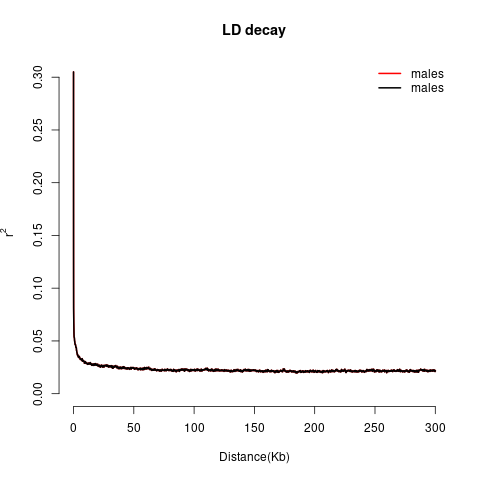

In [67]:
fig=/workspace/hramzr/2_Phd_PROJECT/SNP_stats/figs/

for i in {1..25}
do
display < ${fig}LG${i}_mf.png
done

